In [1]:
import requests
from bs4 import BeautifulSoup
import lxml
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
#Gets the jobs to search by and the corresponding City
jobs = ["Data+Science", "Data+Analyst", "Machine+Learning", "Big+Data", "Data+Scientist", "Business+Intelligence", 
       "Data+Modeler", "Artificial+Intelligence", "Business+Analyst", "Neural+Network", "Data+Engineer", "Data+Consultant", "Python"]

In [1]:
# make request for that page
r = requests.get("https://au.indeed.com/jobs?q=data+science&l=Sydney+NSW")
# turn into a BeautifulSoup object
soup = BeautifulSoup(r.text, 'lxml')


#### Let's see how the searching links look like

In [4]:
#https://au.indeed.com/jobs?q=Data+Analyst&l=Sydney+NSW
#https://au.indeed.com/jobs?q=data+science&l=Sydney+NSW

In [5]:
print jobs

['Data+Science', 'Data+Analyst', 'Machine+Learning', 'Big+Data', 'Data+Scientist', 'Business+Intelligence', 'Data+Modeler', 'Artificial+Intelligence', 'Business+Analyst', 'Neural+Network', 'Data+Engineer', 'Data+Consultant']


#### Let's see how the links by clicking the pages numbers looks like:

In [6]:
# https://au.indeed.com/jobs?q=data+science&l=Sydney+NSW
# https://au.indeed.com/jobs?q=data+science&l=Sydney+NSW&start=10
# https://au.indeed.com/jobs?q=data+science&l=Sydney+NSW&start=20

In [106]:
#Get's the number of pages that the searching method throws
def get_pages(soup1):    
    articles_Qty = soup1.find("div", {"id":"searchCount"}).text
    articles_Qty = int(re.findall("[0-9\,]+", articles_Qty)[2].replace(",", ""))
    pages = articles_Qty/10
    if articles_Qty>pages:
        pages+=1
    return pages

In [107]:
#Get's the salary if the articles has it included, otherwise it will return a nan value. 
def get_salary(soup2):
    try:
        salary = soup2.find("span", {"class": "no-wrap"}).text.strip()
        return salary
    except:
        return np.nan

In [109]:
#Gets the job description of the Article
def get_description(job):
    try:
        r = requests.get("https://au.indeed.com/viewjob?jk={}".format(job.get("data-jk")))
        soup = BeautifulSoup(r.text, 'lxml')
        job_description = soup.find("span", {"id":"job_summary"}).text.strip()
        return job_description
    except:
        return np.nan

In [377]:
json = []
for j in jobs:
        r = requests.get("https://au.indeed.com/jobs?q={}&l=".format(j))
        soup = BeautifulSoup(r.text, 'lxml')
        pages = get_pages(soup)
        print "Scraping {} that contains {} pages".format(j,pages)
        print pages
        for jobs_list in range(0,(pages+1)*10,10):
            r = requests.get("https://au.indeed.com/jobs?q={}&start={}".format(j,jobs_list))
            soup = BeautifulSoup(r.text, 'lxml')
            for job_card in soup.find_all("div",{"class":"row"}): 
                title = job_card.find("a").text
                company = job_card.find("span").text.strip()
                location = job_card.find("span", {"class": "location"}).text
                summary = job_card.find("span", {"class": "summary"}).text.strip()
                salary = get_salary(job_card)
                decription = get_description(job_card)

                job = {"Job Category" : j,
                      "title": title,
                      "company":company,
                      "location":location,
                      "summary":summary,
                      "salary":salary,
                      "description": decription}

                json.append(job)

Articles = pd.DataFrame(json)
Articles.head()

Scraping Data+Science that contains 190 pages
190
Scraping Data+Analyst that contains 271 pages
271
Scraping Machine+Learning that contains 64 pages
64
Scraping Big+Data that contains 179 pages
179
Scraping Data+Scientist that contains 49 pages
49
Scraping Business+Intelligence that contains 159 pages
159
Scraping Data+Modeler that contains 2 pages
2
Scraping Artificial+Intelligence that contains 16 pages
16
Scraping Business+Analyst that contains 493 pages
493
Scraping Neural+Network that contains 4 pages
4
Scraping Data+Engineer that contains 181 pages
181
Scraping Data+Consultant that contains 193 pages
193


,Job Category,company,description,location,salary,summary,title
0,Data+Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,"$110,000 - $150,000 a year","Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...
1,Data+Science,Metigy,@metigy we are creating the next generation of...,Sydney NSW 2000,NaN,"Because of the nature of our platform, Data Sc...",Lead Data Scientist
2,Data+Science,HDR,"HDR specializes in architecture, engineering, ...",Sydney NSW 2000,NaN,Continuously learn and develop new skills in d...,Data Scientist
3,Data+Science,International Institute of Data & Analytics,The International Institute of Data & Analytic...,Sydney NSW,NaN,"In data science and big data analytics, the ID...",Junior Data Analyst/Scientist
4,Data+Science,SAI Global,"At SAI Global, we make Intelligent Risk possib...",Sydney NSW,NaN,Analytics or data science team in a commercial...,Data Scientist


In [ ]:
#Saves the dataframe into an excel file
Articles.to_excel("../Noelia/my_original_scraping_with_description_nulls.xlsx")

In [97]:
Articles = pd.read_excel("../Noelia/my_original_scraping_with_description_nulls.xlsx")

In [99]:
Articles.shape

(6896, 7)

In [69]:
Articles["Job Category"] = Articles["Job Category"].str.replace("+", " ")
Articles.head(200)

,Job Category,company,description,location,salary,summary,title
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,"$110,000 - $150,000 a year","Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...
1,Data Science,Metigy,@metigy we are creating the next generation of...,Sydney NSW 2000,NaN,"Because of the nature of our platform, Data Sc...",Lead Data Scientist
2,Data Science,HDR,"HDR specializes in architecture, engineering, ...",Sydney NSW 2000,NaN,Continuously learn and develop new skills in d...,Data Scientist
3,Data Science,International Institute of Data & Analytics,The International Institute of Data & Analytic...,Sydney NSW,NaN,"In data science and big data analytics, the ID...",Junior Data Analyst/Scientist
4,Data Science,SAI Global,"At SAI Global, we make Intelligent Risk possib...",Sydney NSW,NaN,Analytics or data science team in a commercial...,Data Scientist
5,Data Science,Velrada,Giving you the platform to succeed:\nWorking o...,Melbourne VIC,NaN,With a background in development across Data M...,Data Scientist
6,Data Science,BuildingIQ,"Job Description | Location – Sydney, Australia...",Sydney NSW,NaN,We are looking for a Data Scientist to be a pa...,Data Scientist
7,Data Science,Fortune Select,Location: Sydney\n\nJob Type: Permanent\n\nSki...,Sydney NSW,NaN,3+ years proven career history in Data science...,Data Scientist
8,Data Science,BCG Digital Ventures,Syphen is on the mission to unlock the potenti...,Sydney NSW,NaN,Significant experience in data science field. ...,Data Scientist - Machine Learning Data Platform
9,Data Science,Arup,Data Scientist (SYDDO)\nPrimary Location: Aust...,Sydney NSW,NaN,Experience in applying data science methods to...,Data Scientist


In [70]:
Articles_State = Articles
Articles_State["City"]=Articles_State["location"]
Articles_State["City"]= Articles_State["City"].str.lower()

In [71]:
def search(df, *words):
   """
   Return a sub-DataFrame of those rows whose Name column match all the words.
   """
   return df[np.logical_and.reduce([df.str.contains(word) for word in words])]

In [73]:
Articles_State.loc[search(Articles_State["City"],"brisb").index,"City"] = "Brisbane"
Articles_State.loc[search(Articles_State["City"],"sydney").index,"City"] = "Sydney"
Articles_State.loc[search(Articles_State["City"],"melb").index,"City"] = "Melbourne"
Articles_State.loc[search(Articles_State["City"],"perth").index,"City"] = "Perth"
Articles_State.loc[search(Articles_State["City"],"gold coast").index,"City"] = "Gold Coast"
Articles_State.loc[search(Articles_State["City"],"vic").index,"City"] = "Victoria"
Articles_State.loc[search(Articles_State["City"],"canberra").index,"City"] = "Canberra"

In [77]:
list_jobs= ["Brisbane", "Sydney", "Melbourne","Perth", "Gold Coast", "Victoria", "Canberra"]

Articles_State = Articles_State[Articles_State["City"].isin(list_jobs)]

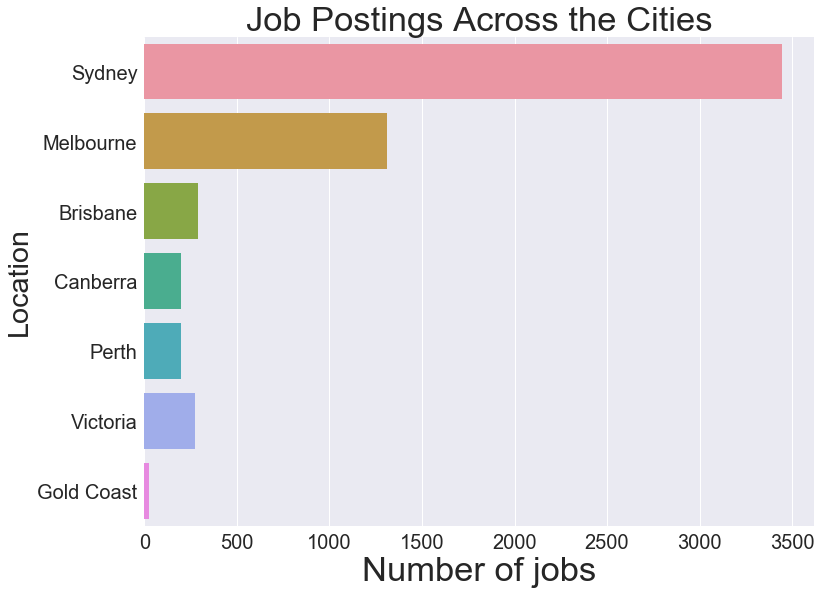

In [82]:
import seaborn as sns
plt.figure(figsize=(12,9))
sns.countplot(y='City',data=Articles_State)
plt.xlabel("Number of jobs",{
      'fontsize'            : 'x-large',
      'verticalalignment'   : 'top',
      'horizontalalignment' : 'center'
      })
plt.ylabel('Location',fontsize= 'large')
plt.title("Job Postings Across the Cities",fontsize = 'x-large')
plt.show()

In [63]:
#Prints out the Qty of the duplicates
print Articles.duplicated().sum()
#Removed the duplicates
Articles = Articles.drop_duplicates()
#Prints the shape of the dataframe without duplicates
Articles.shape

0


(6896, 7)

In [64]:
Articles["description"].replace("\d", "",regex = True, inplace = True)

In [65]:
Articles.drop(Articles[Articles["description"].isnull()].index.values, axis=0, inplace=True)

In [66]:
Articles.shape

(6896, 7)

In [9]:
Articles.to_excel("../Noelia/my_original_scraping_with_description_and_nulls.xlsx")

In [10]:
Articles = pd.read_excel("../Noelia/my_original_scraping_with_description_and_nulls.xlsx")

In [11]:
#Shows how many null values in the "salary' column 
Articles[Articles["salary"].isnull()].shape

(5570, 7)

In [12]:
#Removes the Jobs without a salary value
Articles_with_Salary = Articles[Articles["salary"].notnull()]

In [13]:
#Shape of the dataframe with salary values
Articles_with_Salary.shape

(1326, 7)

In [14]:
Articles_with_Salary.shape

(1326, 7)

In [15]:
#Saves the dataframe into an excel file
Articles_with_Salary.to_excel("../Noelia/my_scraping_with_desc_No_Null.xlsx")

In [ ]:
#Reads the Excel file and saves into a DataFrame 
Articles_with_Salary = pd.read_excel("../Noelia/my_scraping_with_desc_No_Null.xlsx")
Articles_with_Salary.head()

In [ ]:
#Removes the "," from the salary and the "$" sign
Articles_with_Salary["salary"]=Articles_with_Salary["salary"].str.replace(",","")
Articles_with_Salary["salary"]=Articles_with_Salary["salary"].str.replace("$","")

In [ ]:
#It converts the salary regarding the salary type.
def reg(x, salary_type):
    y = int(re.findall("[0-9\,]+",x)[0])
    if salary_type == "week":
        y = y*4*12
    elif salary_type == "day":
        y = y*8*5*4*12
    elif salary_type == "month":
        y = y*12
    return y


In [19]:
#Removes the strings values in the "Salary" column
Articles_with_Salary["salary"] = Articles_with_Salary["salary"].str.replace("a year", "")
Articles_with_Salary.head()

,Job Category,company,description,location,salary,summary,title
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,110000 - 150000,"Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...
11,Data Science,Science Division,Scientist - \n\nJob Title: Scientist\nJob Grad...,Sydney NSW,108792,Organisation Science Division. Job Category En...,Scientist
38,Data Science,Deakin University,In this role you will work on the ARC Discover...,Melbourne VIC,61896 - 67562,"Dr Peta White, Lecturer, Science Education, Te...",Research Assistant
43,Data Science,CSIRO,Join us in developing the next generation of m...,Australia,128000,Creating distributed systems for data science ...,Data Engineer - Machine Learning
51,Data Science,Deloitte,Do you possess the magical ability to transfor...,Sydney NSW,85000,Identifying data gaps through state-of-the-art...,Data Science and Algorithms Consultant


In [20]:
#Gets the salaries per day
Articles_salary_per_day = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("day")]
Articles_salary_per_day.shape

(94, 7)

In [21]:
Articles_salary_per_day["salary"] = Articles_salary_per_day["salary"].apply(lambda x: reg(x, "day"))

/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [22]:
#Gets the salaries per week
Articles_salary_per_week = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("week")]
#Articles_salary_per_week.loc[Articles_with_Salary["salary"].str.contains("week"), "salary"] = 
Articles_salary_per_week.shape

(36, 7)

In [23]:
Articles_salary_per_week["salary"] = Articles_salary_per_week["salary"].apply(lambda x: reg(x, "week"))

/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
Articles_salary_per_hour = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("hour")]
Articles_salary_per_hour.shape

(79, 7)

In [25]:
Articles_salary_per_month = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("month")]
Articles_salary_per_month["salary"] = Articles_salary_per_month["salary"].apply(lambda x: reg(x, "month"))

/Users/noelialopez83/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


We will remove the rows where salary is meassured per hour, per day and per week because we don't really know how often this woul be to analyse it. 

In [26]:
#Gets rid of the salaries per hour, per day, per week because I can't say it garanties to be a salary per year
Articles_with_Salary = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("day")==False]
Articles_with_Salary = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("week")==False]
Articles_with_Salary = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("hour")== False]
Articles_with_Salary = Articles_with_Salary[Articles_with_Salary["salary"].str.contains("month")== False]
Articles_with_Salary.head()

,Job Category,company,description,location,salary,summary,title
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,110000 - 150000,"Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...
11,Data Science,Science Division,Scientist - \n\nJob Title: Scientist\nJob Grad...,Sydney NSW,108792,Organisation Science Division. Job Category En...,Scientist
38,Data Science,Deakin University,In this role you will work on the ARC Discover...,Melbourne VIC,61896 - 67562,"Dr Peta White, Lecturer, Science Education, Te...",Research Assistant
43,Data Science,CSIRO,Join us in developing the next generation of m...,Australia,128000,Creating distributed systems for data science ...,Data Engineer - Machine Learning
51,Data Science,Deloitte,Do you possess the magical ability to transfor...,Sydney NSW,85000,Identifying data gaps through state-of-the-art...,Data Science and Algorithms Consultant


In [27]:
#Splits the salary by "-"
Articles_with_Salary["salary_split"]=Articles_with_Salary["salary"].str.split('-')


In [28]:
#Splits range salary into minimum and maximum value. Note that if the salary is not in a range it will locate it in 
#as a min value
Articles_with_Salary["salary_min"] = (Articles_with_Salary["salary_split"].str.get(0))
Articles_with_Salary["salary_max"] = (Articles_with_Salary["salary_split"].str.get(1))

let's now fill the null values in the column "salary_max" with the "salary_min" values so I can get their means

In [29]:
#It fill the null values in the "salary_max" with the "salary_min"
Articles_with_Salary.loc[Articles_with_Salary['salary_max'].isnull(), "salary_max"]= Articles_with_Salary['salary_min']

In [677]:
Articles_with_Salary.head(15)

,Job Category,company,description,location,salary,summary,title,salary_split,salary_min,salary_max
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,110000 - 150000,"Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...,"[110000 , 150000 ]",110000,150000
11,Data Science,Science Division,Scientist - \n\nJob Title: Scientist\nJob Grad...,Sydney NSW,108792,Organisation Science Division. Job Category En...,Scientist,[108792 ],108792,108792
38,Data Science,Deakin University,In this role you will work on the ARC Discover...,Melbourne VIC,61896 - 67562,"Dr Peta White, Lecturer, Science Education, Te...",Research Assistant,"[61896 , 67562 ]",61896,67562
43,Data Science,CSIRO,Join us in developing the next generation of m...,Australia,128000,Creating distributed systems for data science ...,Data Engineer - Machine Learning,[128000 ],128000,128000
51,Data Science,Deloitte,Do you possess the magical ability to transfor...,Sydney NSW,85000,Identifying data gaps through state-of-the-art...,Data Science and Algorithms Consultant,[85000 ],85000,85000
53,Data Science,OCTO Technology Australia,"You have graduated in Computer Science, Data S...",Sydney NSW,100000 - 180000,Infrastructure and data science. You have grad...,Data Engineer,"[100000 , 180000 ]",100000,180000
56,Data Science,Freelancer.com,Ten-time Webby award-winning Freelancer.com is...,Sydney NSW,80000 - 120000,"From design, writing, data entry and software ...",Software Engineer,"[80000 , 120000 ]",80000,120000
59,Data Science,Australian National University,Classification: Level B\n\nClassification: Aca...,Canberra ACT,70107 - 128825,The ANU College of Engineering and Computer Sc...,Research Fellow,"[70107 , 128825 ]",70107,128825
73,Data Science,Hello Sunday Morning,Research AssistantFixed Term for - monthsPart-...,Sydney NSW,60000 - 70000,"Previous experience in collection, analysis an...",Research Assistant,"[60000 , 70000 ]",60000,70000
75,Data Science,Fusion Professionals,Fusion Professionals is a dynamic IT services ...,Sydney NSW,60000 - 180000,Build and harden data pipelines for ingestion ...,Big Data Engineer,"[60000 , 180000 ]",60000,180000


In [30]:
#Creation of a Function that returns True if a string can be converted to float, otherwise returnes False
def RepresentsInt(s):
    try: 
        float(s)
        return True
    except ValueError:
        print s
        return False
#Converts objects to float values
Articles_with_Salary["salary_min"] = Articles_with_Salary["salary_min"].apply(lambda x: float(x)if RepresentsInt(x) else x)
Articles_with_Salary["salary_max"] = Articles_with_Salary["salary_max"].apply(lambda x: float(x)if RepresentsInt(x) else x)
#Checks if the columns are now float
print Articles_with_Salary["salary_min"].dtype
print Articles_with_Salary["salary_max"].dtype

float64
float64


In [31]:
#Creates a new column with the mean values 
Articles_with_Salary["salary_mean"] = (Articles_with_Salary["salary_min"]+Articles_with_Salary["salary_max"])/2

In [44]:
Articles_with_Salary.head(100)

,Job Category,company,description,location,salary,summary,title,salary_split,salary_min,salary_max,salary_mean,Job_Title
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,110000 - 150000,"Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...,"[110000 , 150000 ]",110000.0,150000.0,130000.0,artificial intelligence- virtual assistant & n...
11,Data Science,Science Division,Scientist - \n\nJob Title: Scientist\nJob Grad...,Sydney NSW,108792,Organisation Science Division. Job Category En...,Scientist,[108792 ],108792.0,108792.0,108792.0,scientist
38,Data Science,Deakin University,In this role you will work on the ARC Discover...,Melbourne VIC,61896 - 67562,"Dr Peta White, Lecturer, Science Education, Te...",Research Assistant,"[61896 , 67562 ]",61896.0,67562.0,64729.0,research assistant
43,Data Science,CSIRO,Join us in developing the next generation of m...,Australia,128000,Creating distributed systems for data science ...,Data Engineer - Machine Learning,[128000 ],128000.0,128000.0,128000.0,data engineer - machine learning
51,Data Science,Deloitte,Do you possess the magical ability to transfor...,Sydney NSW,85000,Identifying data gaps through state-of-the-art...,Data Science and Algorithms Consultant,[85000 ],85000.0,85000.0,85000.0,data science and algorithms consultant
53,Data Science,OCTO Technology Australia,"You have graduated in Computer Science, Data S...",Sydney NSW,100000 - 180000,Infrastructure and data science. You have grad...,Data Engineer,"[100000 , 180000 ]",100000.0,180000.0,140000.0,data engineer
56,Data Science,Freelancer.com,Ten-time Webby award-winning Freelancer.com is...,Sydney NSW,80000 - 120000,"From design, writing, data entry and software ...",Software Engineer,"[80000 , 120000 ]",80000.0,120000.0,100000.0,Softwear Engineer
59,Data Science,Australian National University,Classification: Level B\n\nClassification: Aca...,Canberra ACT,70107 - 128825,The ANU College of Engineering and Computer Sc...,Research Fellow,"[70107 , 128825 ]",70107.0,128825.0,99466.0,research fellow
73,Data Science,Hello Sunday Morning,Research AssistantFixed Term for - monthsPart-...,Sydney NSW,60000 - 70000,"Previous experience in collection, analysis an...",Research Assistant,"[60000 , 70000 ]",60000.0,70000.0,65000.0,research assistant
75,Data Science,Fusion Professionals,Fusion Professionals is a dynamic IT services ...,Sydney NSW,60000 - 180000,Build and harden data pipelines for ingestion ...,Big Data Engineer,"[60000 , 180000 ]",60000.0,180000.0,120000.0,Big Data


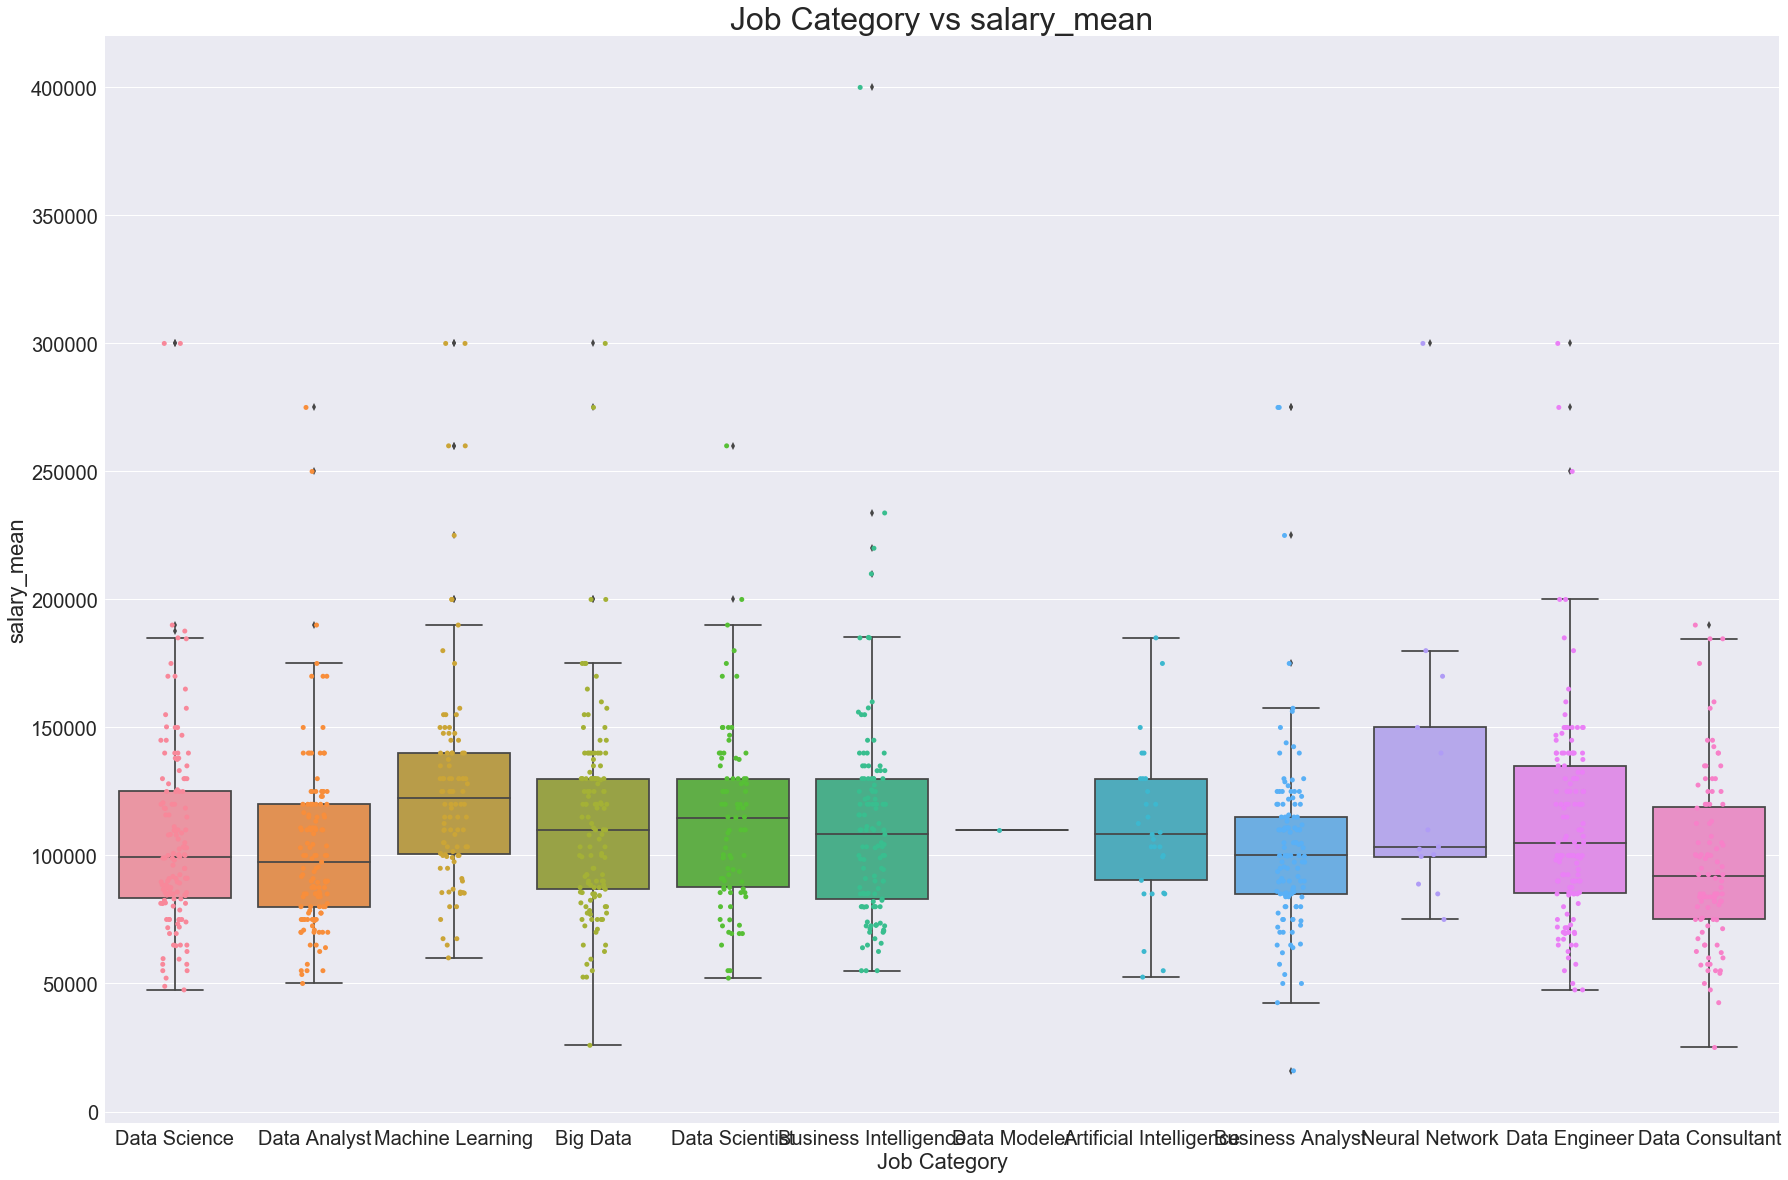

In [79]:
#Plot the boxplots of Job Category against Salary
sns.set(rc={"figure.figsize": (30, 20)}, font_scale=2)
ax = sns.boxplot(x="Job Category", y="salary_mean", 
                data=Articles_with_Salary)
ax = sns.stripplot(x="Job Category", y="salary_mean",
                   data=Articles_with_Salary, jitter=True,
                   edgecolor="gray")
plt.title("Job Category vs salary_mean",fontsize=32);
plt.show()

In [53]:
Articles_plot = Articles_with_Salary
Articles_plot["Job_Title"]=Articles_plot["title"]
Articles_plot["Job_Title"]= Articles_plot["Job_Title"].str.lower()

In [54]:
Articles_plot.loc[search(Articles_plot["Job_Title"],"data","sci").index,"Job_Title"] = "Data Science"
Articles_plot.loc[search(Articles_plot["Job_Title"],"softw","engin").index,"Job_Title"] = "Softwear Engineer"
Articles_plot.loc[search(Articles_plot["Job_Title"],"data", "analy").index,"Job_Title"] = "Data Analyst"
Articles_plot.loc[search(Articles_plot["Job_Title"],"business","analyst").index,"Job_Title"] = "Business Analyst"
Articles_plot.loc[search(Articles_plot["Job_Title"],"data","big").index,"Job_Title"] = "Big Data"

In [55]:
list_jobs= ["Data Science", "Softwear Engineer", "Data Analyst","Business Analyst"
, "Big Data", "Senior Data Analyst"]

Articles_plot = Articles_plot[Articles_plot["Job_Title"].isin(list_jobs)]
Articles_plot.shape

(376, 12)

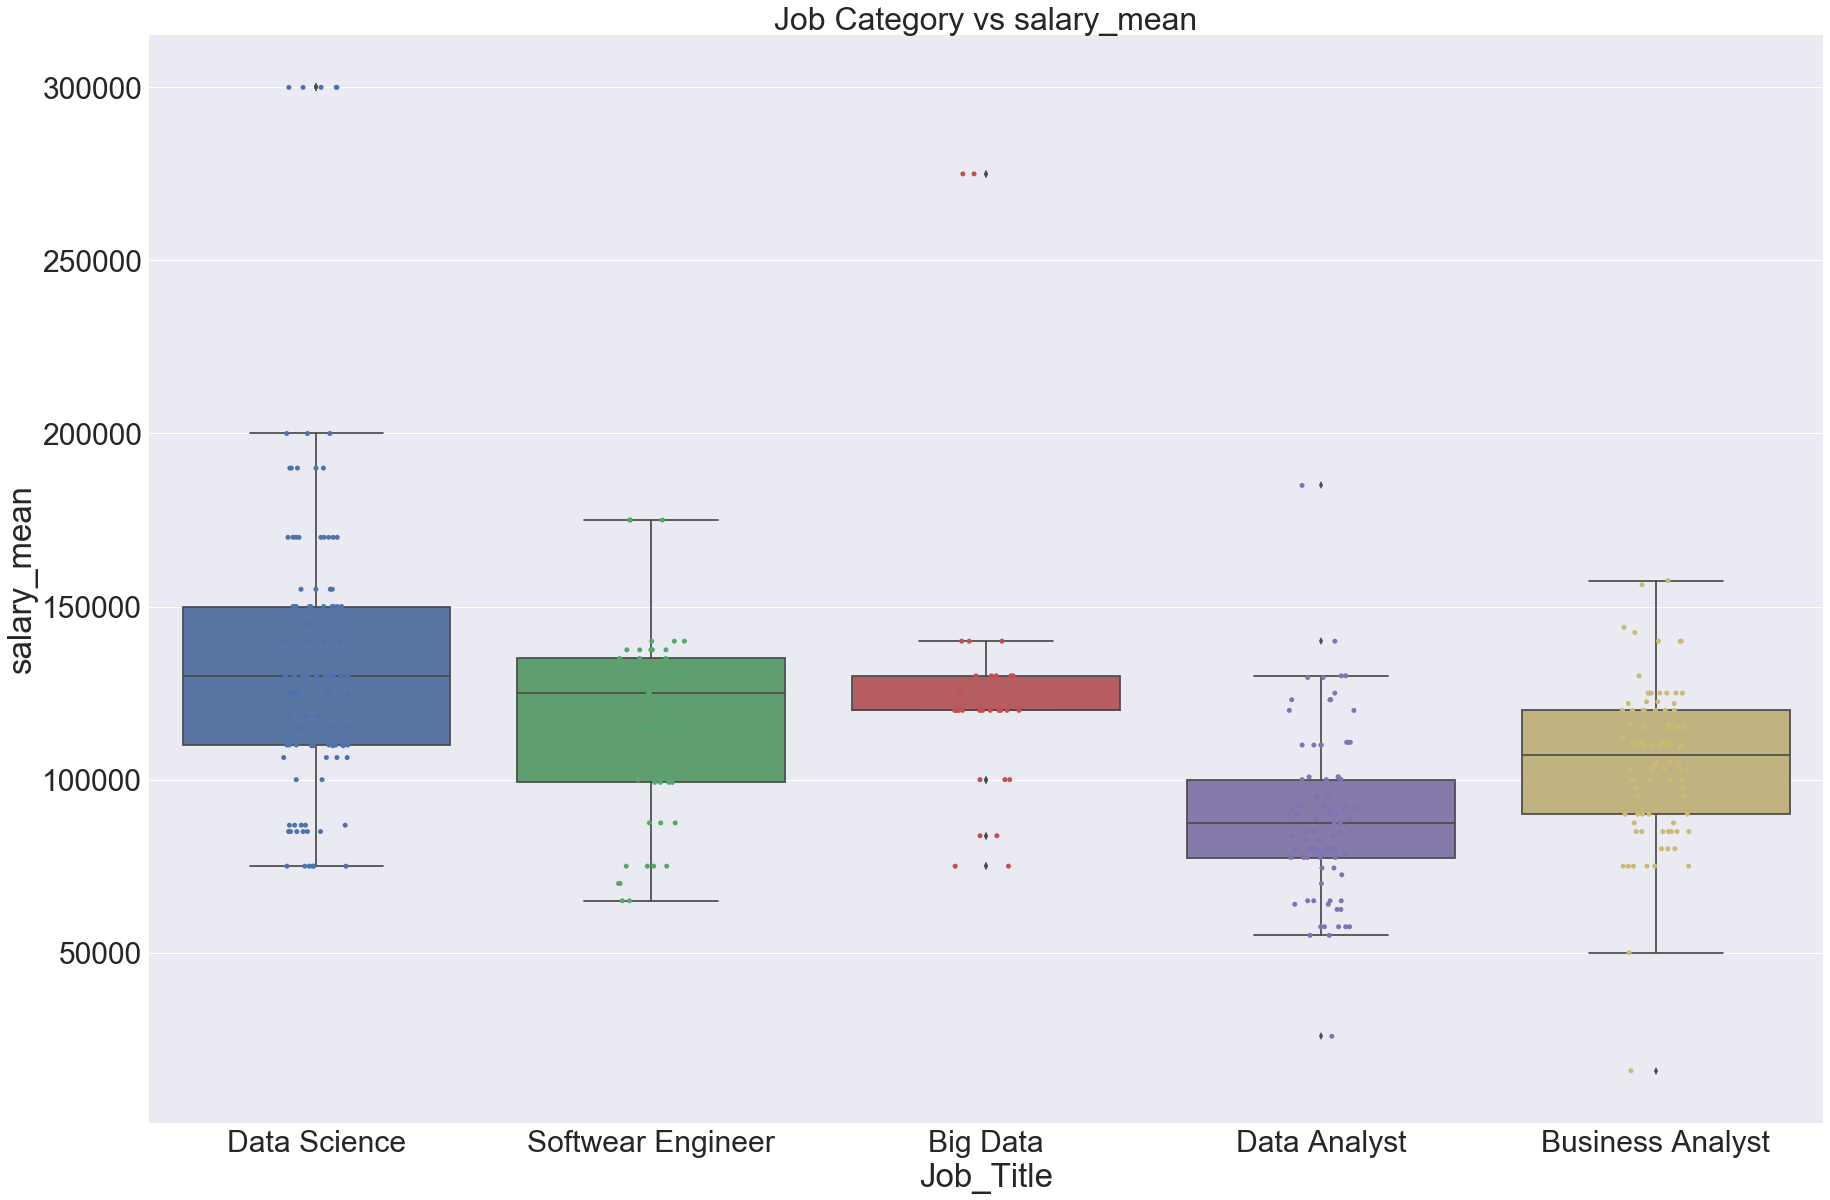

In [59]:
#Plot the boxplots of Job Category against Salary
sns.set(rc={"figure.figsize": (30, 20)}, font_scale=3)
ax = sns.boxplot(x="Job_Title", y="salary_mean", 
                data=Articles_plot)
ax = sns.stripplot(x="Job_Title", y="salary_mean",
                   data=Articles_plot, jitter=True,
                   edgecolor="gray")
plt.title("Job Category vs salary_mean",fontsize=32);
plt.show()

In [681]:
#Removing Outliers
elements = Articles_with_Salary["salary_mean"] 
if elements.dtype != 'object':       
    mean = np.mean(elements, axis=0)
    sd = np.std(elements, axis=0)
    upper= mean + 4 * sd
    lower= mean - 4 * sd
    out = Articles_with_Salary[(elements>upper) | (elements<lower)].index.values
    for i in out:
        print 'Outliers removed:-------------------------------------------------------'
        print Articles_with_Salary["salary"][i]
    Articles_with_Salary = Articles_with_Salary.drop(out,axis=0)
    count = len(out)
print '--------------------------------------------------------------------------------'
print 'Outliers removed:',count

Outliers removed:-------------------------------------------------------
200000 - 400000 
Outliers removed:-------------------------------------------------------
300000 
Outliers removed:-------------------------------------------------------
250000 - 300000 
Outliers removed:-------------------------------------------------------
300000 
Outliers removed:-------------------------------------------------------
200000 - 400000 
Outliers removed:-------------------------------------------------------
300000 
Outliers removed:-------------------------------------------------------
275000 
Outliers removed:-------------------------------------------------------
400000 
Outliers removed:-------------------------------------------------------
250000 - 300000 
Outliers removed:-------------------------------------------------------
250000 - 300000 
Outliers removed:-------------------------------------------------------
300000 
Outliers removed:-----------------------------------------------

In [682]:
Articles_with_Salary.drop(["salary_split", "salary"], axis=1, inplace = True)


In [683]:
#Saves the dataframe into an excel file
Articles_with_Salary.to_excel("../Noelia/my_scraping_clean_salary.xlsx")

In [101]:
Articles_with_Salary = pd.read_excel("../Noelia/my_scraping_clean_salary.xlsx")

In [86]:
#Drops the Salary and Salary_split columns
#Articles_with_Salary.drop(["salary", "salary_split"], axis=1, inplace=True)
Articles_with_Salary.head()

,Job Category,company,description,location,summary,title,salary_min,salary_max,salary_mean
0,Data Science,Accenture,Are you curious about how digital is changing ...,Sydney NSW,"Bachelor's degree in Computer Science, Enginee...",Artificial Intelligence- Virtual Assistant & N...,110000,150000,130000.0
11,Data Science,Science Division,Scientist - \n\nJob Title: Scientist\nJob Grad...,Sydney NSW,Organisation Science Division. Job Category En...,Scientist,108792,108792,108792.0
38,Data Science,Deakin University,In this role you will work on the ARC Discover...,Melbourne VIC,"Dr Peta White, Lecturer, Science Education, Te...",Research Assistant,61896,67562,64729.0
43,Data Science,CSIRO,Join us in developing the next generation of m...,Australia,Creating distributed systems for data science ...,Data Engineer - Machine Learning,128000,128000,128000.0
51,Data Science,Deloitte,Do you possess the magical ability to transfor...,Sydney NSW,Identifying data gaps through state-of-the-art...,Data Science and Algorithms Consultant,85000,85000,85000.0


In [87]:
#Gets the Salary Shape
Articles_with_Salary.shape

(1103, 9)

In [88]:
#Gets the Salary_mean
Articles_with_Salary["salary_mean"].describe()

count      1103.000000
mean     107399.529012
std       32914.389671
min       15900.000000
25%       85000.000000
50%      103379.000000
75%      125335.750000
max      260000.000000
Name: salary_mean, dtype: float64

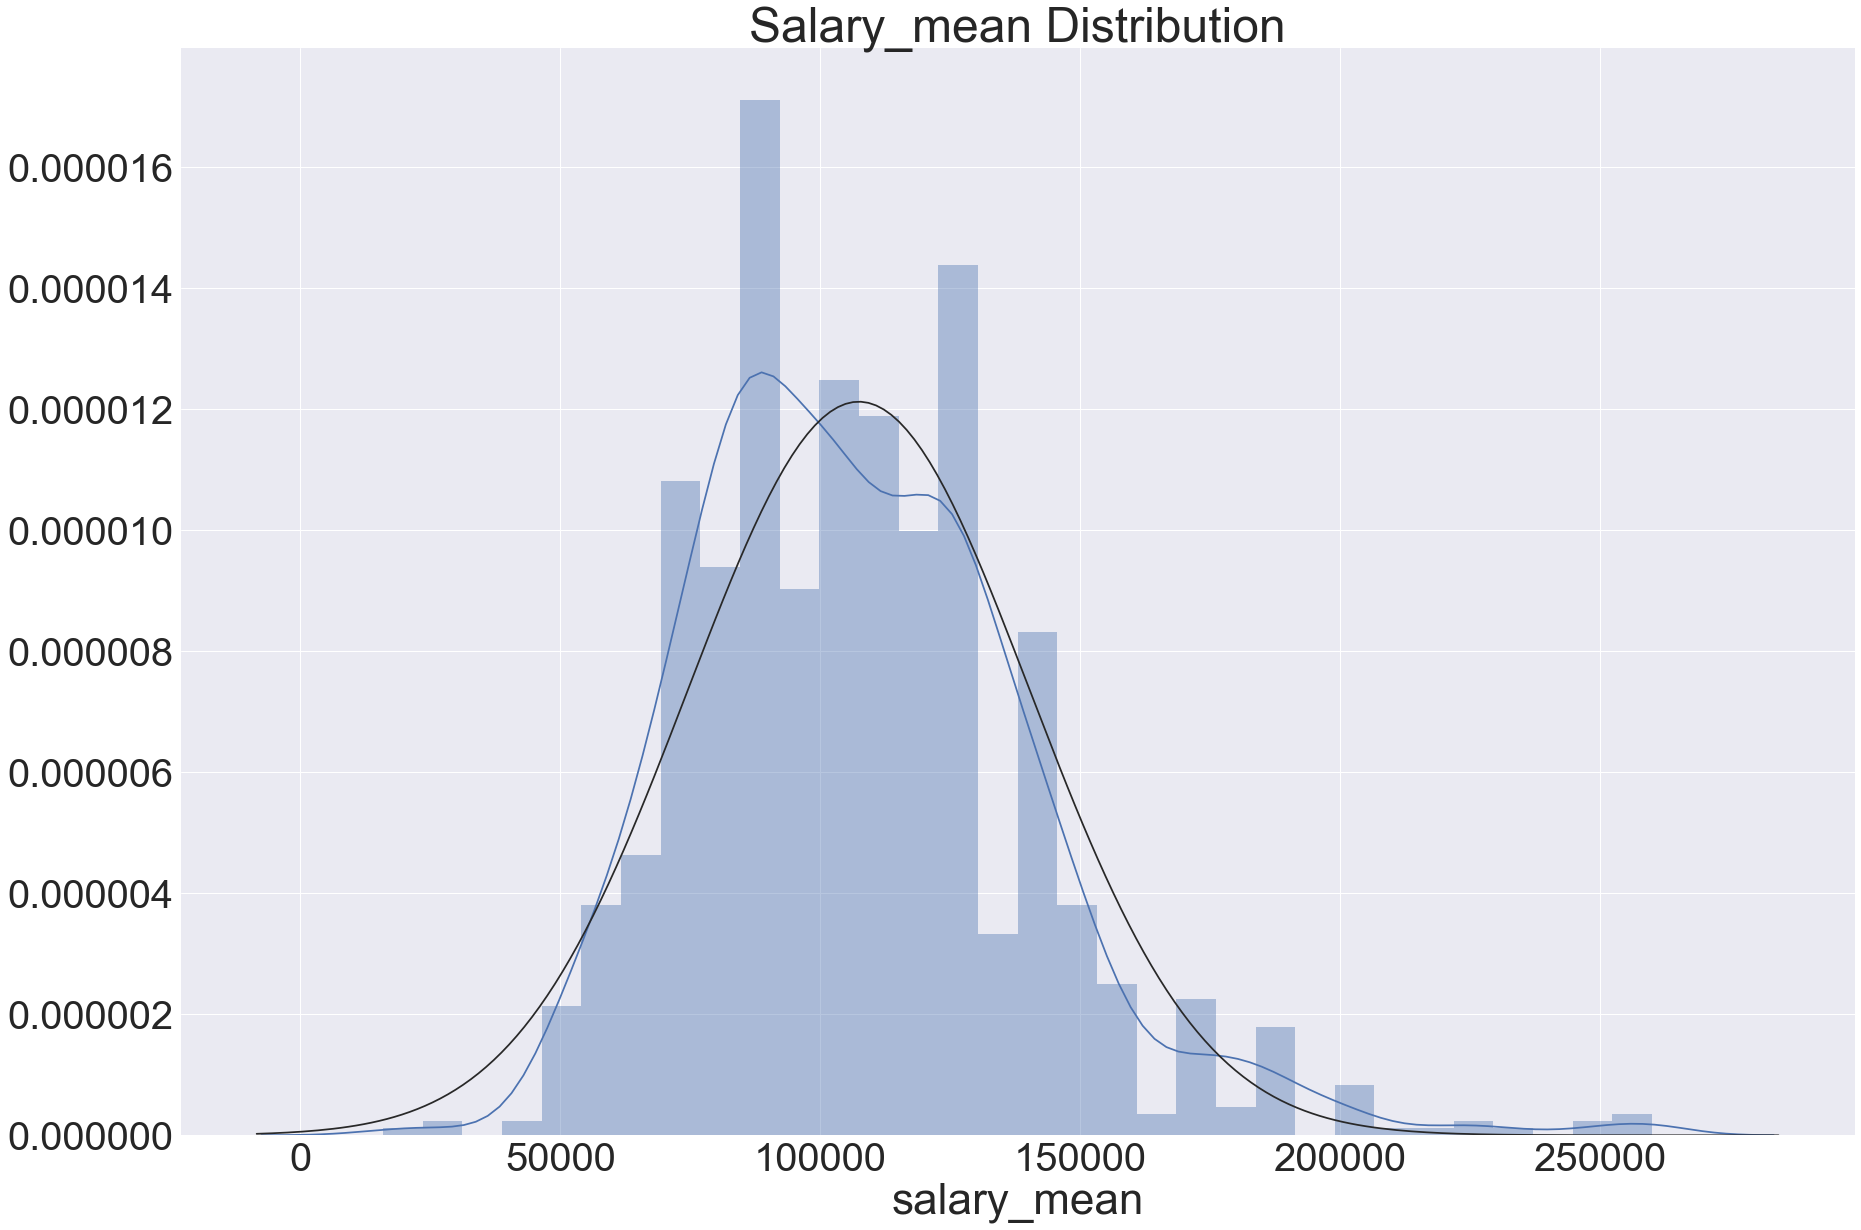

In [95]:
#Plots the Salary Distribution
sns.set(rc={"figure.figsize": (30, 20)}, font_scale=4)
sns.distplot(Articles_with_Salary["salary_mean"], fit=norm).set_title('Salary_mean Distribution')
plt.show()

In [90]:
Articles_with_Salary = Articles_with_Salary.sort_values(['salary_mean'], ascending = True)
salary_median = np.median(Articles_with_Salary["salary_mean"])

In [91]:
print salary_median

103379.0


### To proceed with our analysis we are gonna take the median of the distribution and classify the salary as high or low:
Salary_Type = 0 if Salary is below the Median

Salary_Type = 1 if Salary is above the Median

In [92]:
Articles_with_Salary["Salary_type"] = [1 if x>=salary_median else 0 for x in Articles_with_Salary["salary_mean"]]

In [96]:
Articles_with_Salary.head(15)

,Job Category,company,description,location,summary,title,salary_min,salary_max,salary_mean,Salary_type
14677,Business Analyst,Bolton Clarke,Give yourself a pay rise - eligibility for up ...,Australia,Strong understanding of business analytics too...,Business Performance Analyst,15900,15900,15900.0,0
25428,Data Consultant,Robert Half Australia,Are you a sales superstar? Great opportunity t...,Melbourne VIC,Great opportunity to join a large team as a Cu...,Telesales Consultant | $53K + Super | Temp to ...,25000,25000,25000.0,0
8896,Big Data,Swinburne University of Technology,"Faculty of Science, Engineering and Technology...",Melbourne VIC,A 3 year fully-funded PhD scholarship is avail...,PhD Scholarship – Big Data Analytics for Oil D...,25849,25849,25849.0,0
25510,Data Consultant,Kennedy Reid,The recruitment industry is one that is overlo...,Sydney NSW,High data entry speed and excellent attention ...,Recruitment Administrator,40000,45000,42500.0,0
15837,Business Analyst,Janison Solutions,THE GIGThe Learning Support Specialist primary...,Coffs Harbour NSW,"Our passion for excellence, innovation and per...",Learning Support Specialist,40000,45000,42500.0,0
22692,Data Engineer,Macro Recruitment,Dream job for an engineer with experience in a...,Somerton VIC,Dream job for an engineer with experience in a...,Solid Mechanics Engineer,45000,50000,47500.0,0
1294,Data Science,Macro Recruitment,Dream job for an engineer with experience in a...,Somerton VIC,Assist with the collection and analysis of exp...,Solid Mechanics Engineer,45000,50000,47500.0,0
25694,Data Consultant,Auscare Group,SchedulerAuscare Group is a leading staffing a...,Perth WA,Completing weekly performance data reports ens...,Scheduler,45000,50000,47500.0,0
21485,Data Engineer,NICSA IT,General Roles and ResponsibilitiesCoordinate w...,Hervey Bay QLD,Smart hand support for peripheral and networki...,Full Time Desktop Support Engineer,45000,50000,47500.0,0
457,Data Science,University of Southern Queensland,Institute for Resilient Regions\nAbout us\n\nT...,Australia,The management of participant recruitment and ...,Research Officer,45833,51981,48907.0,0


In [692]:
Articles_with_Salary.drop(["salary_max","salary_min"], axis=1, inplace = True)

In [693]:
Articles_with_Salary.head()

,Job Category,company,description,location,summary,title,salary_mean,Salary_type
14677,Business Analyst,Bolton Clarke,Give yourself a pay rise - eligibility for up ...,Australia,Strong understanding of business analytics too...,Business Performance Analyst,15900.0,0
25428,Data Consultant,Robert Half Australia,Are you a sales superstar? Great opportunity t...,Melbourne VIC,Great opportunity to join a large team as a Cu...,Telesales Consultant | $53K + Super | Temp to ...,25000.0,0
8896,Big Data,Swinburne University of Technology,"Faculty of Science, Engineering and Technology...",Melbourne VIC,A 3 year fully-funded PhD scholarship is avail...,PhD Scholarship – Big Data Analytics for Oil D...,25849.0,0
25510,Data Consultant,Kennedy Reid,The recruitment industry is one that is overlo...,Sydney NSW,High data entry speed and excellent attention ...,Recruitment Administrator,42500.0,0
15837,Business Analyst,Janison Solutions,THE GIGThe Learning Support Specialist primary...,Coffs Harbour NSW,"Our passion for excellence, innovation and per...",Learning Support Specialist,42500.0,0


In [694]:
#Saves the dataframe into an excel file
Articles_with_Salary.to_excel("../Noelia/my_scraping_final.xlsx")